### Random Vector/Vetor aleatório
https://www.probabilitycourse.com/chapter6/6_1_5_random_vectors.php <br>
When dealing with multiple random variables, it is sometimes useful to use vector and matrix notations. When we have n random variables X1, X2, ..., Xn we can put them in a (column) vector X <br>
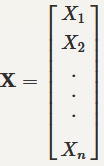
- We call X a **random vector**. Here X is an n-dimensional vector because it consists of n random variables. 

### Loss Function/Função de Custo
The function we want to minimize or maximize is called the **objective function** or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function.
- The loss function is the function that computes the distance between the current output of the algorithm and the expected output.
- Cross-entropy and mean squared error are the two main types of loss functions to use when training neural network models.
- At its core, a loss function is incredibly simple: It’s a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.

### Modelo de Regressão Linear
https://matheusfacure.github.io/2017/03/03/func-custo-regr/#func-obj <br>
Nos modelos de regressão lineares, queremos saber a função $F(x)$ para predizer o valor de saída Y. O modelo exige uma função de custo: a mais comum é o erro quadrático médio: $L=(y−\hat{y})^{2}$.